Исследование на стационарность

ADF Statistic: -3.1931300687379647
p-value: 0.02038579756804483
Critical Values:
   1%: -3.4464005219454155
   5%: -2.868615280538588
   10%: -2.570538905413444
Ряд 'Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС' стационарен (отвергаем нулевую гипотезу)


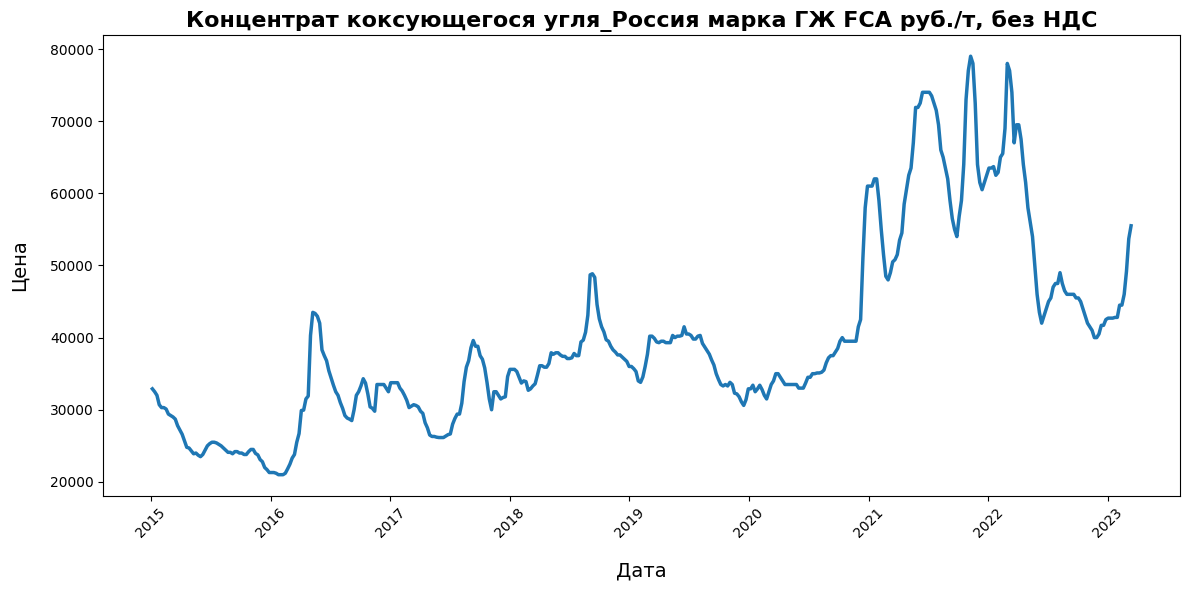

In [454]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("df_merged_cleaned.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

for column in data.columns[1:]:
    # Проведение теста Дики-Фуллера
    result = adfuller(data[column])
    
    
    # Интерпретация результата
    if result[1] < 0.05:
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f"Ряд '{column}' стационарен (отвергаем нулевую гипотезу)")

        # Выводим стационарный ряд
        plt.figure(figsize=(12, 6))  # размер графика
        sns.lineplot(x='Date', y=data.columns[-1], data=data, linewidth=2.5)

        # Настройки заголовка и меток
        plt.title(column, fontsize=16, fontweight='bold')
        plt.xlabel('Дата',labelpad=15, fontsize=14)
        plt.ylabel('Цена',labelpad=15, fontsize=14)
        plt.xticks(rotation=45)  # поворот меток по оси X
        plt.tight_layout()  # улучшение размещения элементов на графике

        plt.show()


In [12]:
from statsmodels.tsa.api import VAR

In [455]:
df = pd.read_csv("df_merged_cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df['Price'] = df['Цена на арматуру']
df = df.drop(columns=['Цена на арматуру', 'Date'])

In [456]:
varima_model = VAR(df.diff().dropna())

c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [457]:
varima_results = varima_model.fit(maxlags=5)
y_pred3 = varima_results.forecast(df.diff().dropna().values[-varima_results.k_ar:], steps=368 )

In [ ]:
# Оценка качества модели VARIMA
varima_results.summary()

In [ ]:
forecast_df = pd.DataFrame(y_pred3, columns=df.diff().dropna().columns)
forecast_df.index = df.index
# Фактические значения целевой переменной
actual_prices = df['Price'].diff()

# Прогнозы для целевой переменной
forecast_prices = forecast_df['Price'].diff()

# Создаём временной индекс для прогнозов
forecast_index = pd.RangeIndex(start=len(actual_prices), stop=len(actual_prices) + 368 , step=1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Фактические значения (Price)')
plt.plot(forecast_index, forecast_prices, label='Прогнозы VARIMA (Price)', linestyle='--', color='red')
plt.title('Сравнение фактических значений и прогнозов VAR')
plt.xlabel('Время')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [279]:
forecast_df

,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т",...,"Лом_HMS 1/2 80:20, CFR Турция, $/т","Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС",Price
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-06,-405.594542,-20.342427,-168.290735,933.632217,328.348685,-2.461268,13.498179,-629.067937,-2.917167,-17.471867,...,-15.980844,-471.617983,-587.164110,-5.922785,-25.480269,83.201461,21.420782,49.950532,1.132982,-10092.100449
2015-01-19,794.002360,-0.944087,-374.776840,-120.485655,-170.126820,1.764567,-7.663204,594.335058,0.202154,-0.057474,...,0.905510,720.545971,555.401893,2.118507,0.086769,322.965909,353.970705,175.995880,3.167029,7712.610652
2015-01-26,1280.904355,-11.229578,-1261.318972,-423.571076,-1040.796285,1.505362,12.642184,1110.832598,2.547015,-5.895444,...,-8.103905,864.859650,694.914979,11.283008,14.486423,248.751070,210.044783,-83.451425,-0.241495,-5734.613969
2015-02-02,-386.957159,-1.601807,-910.375080,-602.487281,-805.175144,3.428148,-4.552484,-126.462066,5.550321,-5.740291,...,-2.734704,132.567826,152.565605,10.433658,-10.932562,-9.978667,36.015646,89.048002,0.829183,960.004952
2015-02-09,885.862671,-2.868899,-291.173428,-1049.055523,-731.664252,4.646107,3.380143,648.889804,4.994400,-2.046789,...,-2.980472,471.086292,338.804017,4.202235,0.280058,-117.568925,-83.469496,-49.905406,-1.260605,-5150.694944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,12.681647,0.437589,29.195098,32.278485,24.894237,0.193510,0.592452,6.542308,0.202290,0.452225,...,0.466039,10.904934,7.957253,0.666116,0.392608,4.977296,7.840583,4.845009,0.094926,50.338656
2023-02-20,12.681647,0.437589,29.195098,32.278485,24.894237,0.193510,0.592452,6.542308,0.202290,0.452225,...,0.466039,10.904934,7.957253,0.666116,0.392608,4.977296,7.840583,4.845009,0.094926,50.338656
2023-02-27,12.681647,0.437589,29.195098,32.278485,24.894237,0.193510,0.592452,6.542308,0.202290,0.452225,...,0.466039,10.904934,7.957253,0.666116,0.392608,4.977296,7.840583,4.845009,0.094926,50.338656


Превращаем все колонки в стационарные (кроме цены)

Логарифм

In [460]:
import numpy as np

In [461]:
df_log = np.log(df.drop(columns='Price'))
df_log.replace([np.nan, -np.inf], 0, inplace=True)
df_log['Price'] = df['Price']
df_log.index = df.index


Дифференциал

In [462]:
df_diff_log = df_log.drop(columns='Price').diff()
df_diff_log['Price'] = df['Price']
df_diff_log.index = df.index


In [463]:
df_diff_log.isnull().sum().sum()

np.int64(38)

In [464]:
df_diff_log = df_diff_log.interpolate(method='linear').fillna(method='bfill')  # заполнение назад

C:\Users\egorb\AppData\Local\Temp\ipykernel_36692\608548028.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_diff_log = df_diff_log.interpolate(method='linear').fillna(method='bfill')  # заполнение назад


In [465]:
df_diff_log.isnull().sum().sum()

np.int64(0)

Добавить проверку на стационарность

Оно тут ненужно

In [ ]:
plt.figure(figsize=(30, 13))
sns.heatmap(df_diff_log.corr(), annot=True)

Обучаем на Дифферинциальных и Логарифмических данных VAR

In [467]:
train_size = int(len(df_diff_log) * 0.8)
train, test = df_diff_log.iloc[:train_size], df_diff_log.iloc[train_size:]

In [468]:
var_model = VAR(train)

c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [469]:
var_results = var_model.fit(maxlags=5, ic='aic')
y_pred2 = var_results.forecast(train.values[-var_results.k_ar:], steps=len(test))

In [470]:
forecast_df = pd.DataFrame(y_pred2, columns=test.columns)
forecast_df.index = test.index

In [471]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [472]:
from math import sqrt
r2 = r2_score(test, forecast_df)
mae = mean_absolute_error(test, forecast_df)
mse = mean_squared_error(test, forecast_df)
rmse = sqrt(mean_squared_error(test, forecast_df))
print(f'R2: {r2}\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}')

R2: -1.935835763787582
MAE: 1966.621071757098
MSE: 210807921.41388193
RMSE: 14519.225923370775


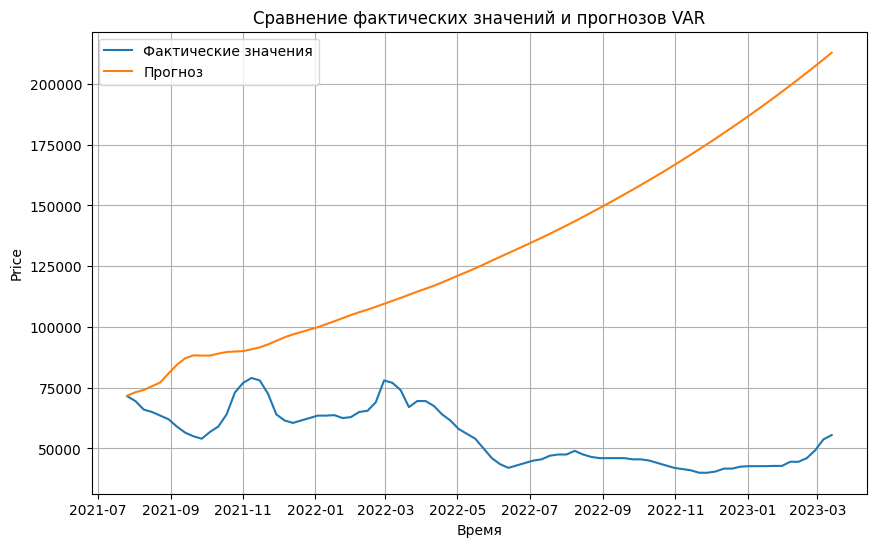

In [473]:
# Построение графика
plt.figure(figsize=(10, 6))
# plt.plot(train.index, train['Price'], label='Фактические значения')
plt.plot(test.index, test['Price'], label='Фактические значения')
plt.plot(test.index, forecast_df['Price'], label='Прогноз')
plt.title('Сравнение фактических значений и прогнозов VAR')
plt.xlabel('Время')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Обучаем на Дифферинциальных и Логарифмических данных SARIMAX

In [474]:
from statsmodels.tsa.api import SARIMAX

In [475]:
train_size = int(len(df_diff_log) * 0.8)
train, test = df_diff_log.iloc[:train_size], df_diff_log.iloc[train_size:]

In [476]:
sarimax_model = SARIMAX(train['Price'], exog=train.drop(columns='Price'), order=(1, 0, 1))
sarimax_results = sarimax_model.fit(disp=False)

c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [477]:
forecast = sarimax_results.forecast(steps=len(test), exog=test.drop(columns='Price'))

In [478]:
from math import sqrt
r2 = r2_score(test['Price'], forecast)
mae = mean_absolute_error(test['Price'], forecast)
mse = mean_squared_error(test['Price'], forecast)
rmse = sqrt(mse)

print(f'R2: {r2}\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}')

R2: -4.64689433846724
MAE: 20005.825310473538
MSE: 739920971.376321
RMSE: 27201.488403694402


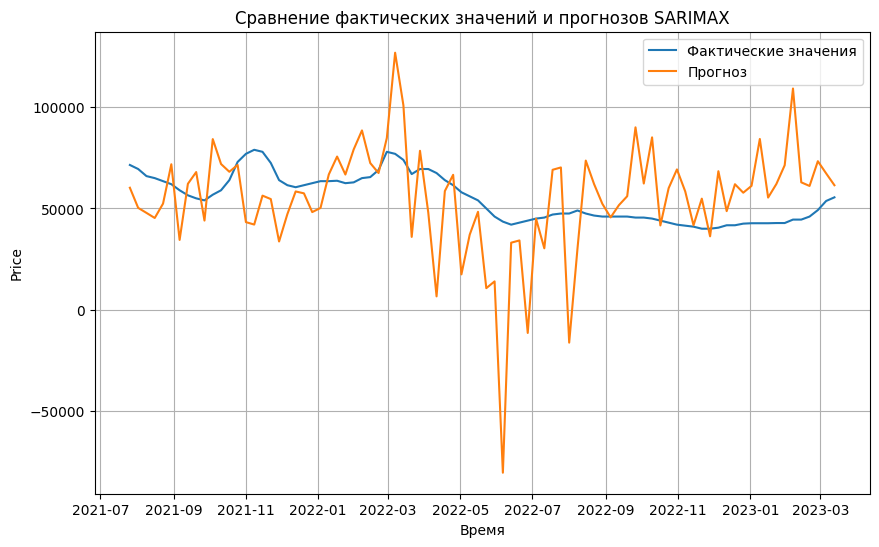

In [479]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label="Фактические значения")
plt.plot(test.index, forecast, label="Прогноз")
plt.title('Сравнение фактических значений и прогнозов SARIMAX')
plt.xlabel('Время')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()